<a href="https://colab.research.google.com/github/gabetrix/public-notebooks/blob/main/IA_M4_DLPLV_T2_Aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [47]:
X = pd.read_csv("https://raw.githubusercontent.com/gabetrix/public-datasets/main/OSI_feats_e3.csv")
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_6,Region_7,Region_8,Region_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
y = pd.read_csv("https://raw.githubusercontent.com/gabetrix/public-datasets/main/OSI_target_e2.csv")
y.head()

,Revenue
0,0
1,0
2,0
3,0
4,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (9864, 68)
X_test shape: (2466, 68)
y_train shape: (9864, 1)
y_test shape: (2466, 1)


In [50]:
model = Sequential()
model.add(Dense(68, input_dim=68, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.add(Dense(1, activation="sigmoid"))

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
247/247 [==============================] - 1s 5ms/step - loss: 0.2676 - accuracy: 0.8946 - val_loss: 0.2359 - val_accuracy: 0.9067
Epoch 2/20
247/247 [==============================] - 1s 4ms/step - loss: 0.2253 - accuracy: 0.9071 - val_loss: 0.2288 - val_accuracy: 0.9062
Epoch 3/20
247/247 [==============================] - 1s 4ms/step - loss: 0.2187 - accuracy: 0.9091 - val_loss: 0.2283 - val_accuracy: 0.9067
Epoch 4/20
247/247 [==============================] - 1s 3ms/step - loss: 0.2144 - accuracy: 0.9113 - val_loss: 0.2256 - val_accuracy: 0.9067
Epoch 5/20
247/247 [==============================] - 1s 5ms/step - loss: 0.2110 - accuracy: 0.9117 - val_loss: 0.2273 - val_accuracy: 0.9047
Epoch 6/20
247/247 [==============================] - 1s 5ms/step - loss: 0.2082 - accuracy: 0.9117 - val_loss: 0.2264 - val_accuracy: 0.9057
Epoch 7/20
247/247 [==============================] - 1s 5ms/step - loss: 0.2060 - accuracy: 0.9138 - val_loss: 0.2259 - val_accuracy: 0.9057
Epoch 

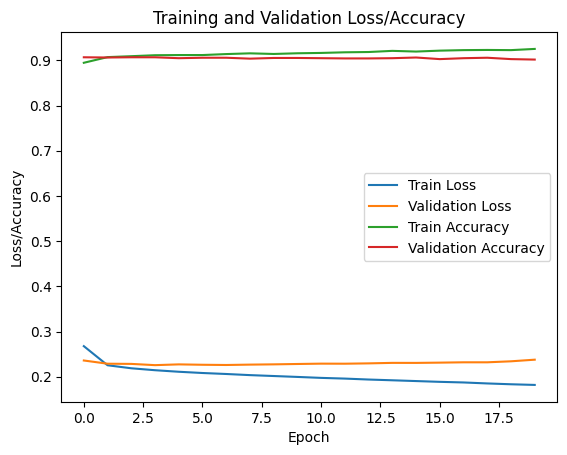

In [58]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [59]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

78/78 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8840
Test Loss: 0.2846464216709137, Test Accuracy: 0.8840227127075195
